In [2]:
!unzip digits_IA_embarque.zip

Archive:  digits_IA_embarque.zip
   creating: digits/
   creating: digits/digits0/
  inflating: digits/digits0/digit_0.png  
  inflating: digits/digits0/digit_1.png  
  inflating: digits/digits0/digit_10.png  
  inflating: digits/digits0/digit_11.png  
  inflating: digits/digits0/digit_12.png  
  inflating: digits/digits0/digit_13.png  
  inflating: digits/digits0/digit_14.png  
  inflating: digits/digits0/digit_15.png  
  inflating: digits/digits0/digit_16.png  
  inflating: digits/digits0/digit_17.png  
  inflating: digits/digits0/digit_18.png  
  inflating: digits/digits0/digit_19.png  
  inflating: digits/digits0/digit_2.png  
  inflating: digits/digits0/digit_3.png  
  inflating: digits/digits0/digit_4.png  
  inflating: digits/digits0/digit_5.png  
  inflating: digits/digits0/digit_6.png  
  inflating: digits/digits0/digit_7.png  
  inflating: digits/digits0/digit_8.png  
  inflating: digits/digits0/digit_9.png  
   creating: digits/digits1/
  inflating: digits/digits1/digit_0.pn

['digits0', 'digits1', 'digits2', 'digits3', 'digits4', 'digits5', 'digits6', 'digits7', 'digits8', 'digits9']
{'digits0': 0, 'digits1': 1, 'digits2': 2, 'digits3': 3, 'digits4': 4, 'digits5': 5, 'digits6': 6, 'digits7': 7, 'digits8': 8, 'digits9': 9}
cpu
Epoch 1, loss = 0.6570
Epoch 2, loss = 0.5045
Epoch 3, loss = 0.4880
Epoch 4, loss = 0.4784
Epoch 5, loss = 0.4683
Epoch 6, loss = 0.4601
Epoch 7, loss = 0.4503
Epoch 8, loss = 0.4406
Epoch 9, loss = 0.4353
Epoch 10, loss = 0.4256
Epoch 11, loss = 0.4193
Epoch 12, loss = 0.4131
Epoch 13, loss = 0.4069
Epoch 14, loss = 0.4017
Epoch 15, loss = 0.3949
Epoch 16, loss = 0.3910
Epoch 17, loss = 0.3852
Epoch 18, loss = 0.3792
Epoch 19, loss = 0.3767
Epoch 20, loss = 0.3720
Epoch 21, loss = 0.3681
Epoch 22, loss = 0.3661
Epoch 23, loss = 0.3623
Epoch 24, loss = 0.3599
Epoch 25, loss = 0.3553
Epoch 26, loss = 0.3545
Epoch 27, loss = 0.3519
Epoch 28, loss = 0.3495
Epoch 29, loss = 0.3464
Epoch 30, loss = 0.3471


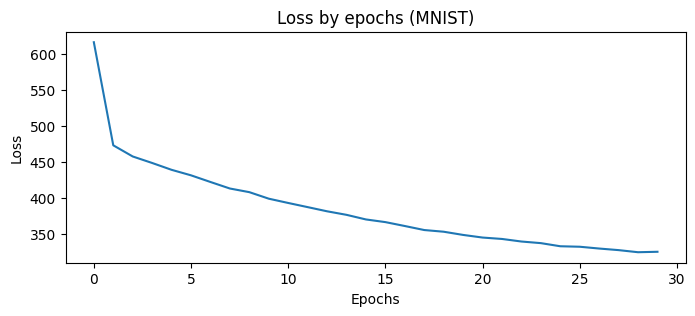

Accuracy sur MNIST=91.22%


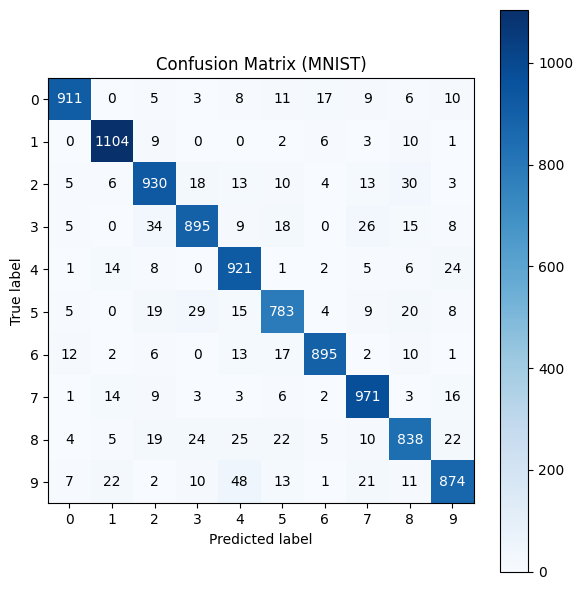

Epoch 1, loss = 2.4153
Epoch 2, loss = 1.6701
Epoch 3, loss = 1.2119
Epoch 4, loss = 1.1515
Epoch 5, loss = 1.1020
Epoch 6, loss = 1.0188
Epoch 7, loss = 0.9114
Epoch 8, loss = 0.7163
Epoch 9, loss = 0.5267
Epoch 10, loss = 0.4814
Epoch 11, loss = 0.4921
Epoch 12, loss = 0.4087
Epoch 13, loss = 0.3331
Epoch 14, loss = 0.2933
Epoch 15, loss = 0.2571
Epoch 16, loss = 0.2222
Epoch 17, loss = 0.1840
Epoch 18, loss = 0.1715
Epoch 19, loss = 0.1531
Epoch 20, loss = 0.1370
Epoch 21, loss = 0.1061
Epoch 22, loss = 0.1006
Epoch 23, loss = 0.1043
Epoch 24, loss = 0.1015
Epoch 25, loss = 0.0748
Epoch 26, loss = 0.0674
Epoch 27, loss = 0.0611
Epoch 28, loss = 0.0628
Epoch 29, loss = 0.0586
Epoch 30, loss = 0.0509
Epoch 31, loss = 0.0466
Epoch 32, loss = 0.0501
Epoch 33, loss = 0.0418
Epoch 34, loss = 0.0416
Epoch 35, loss = 0.0378
Epoch 36, loss = 0.0375
Epoch 37, loss = 0.0380
Epoch 38, loss = 0.0339
Epoch 39, loss = 0.0347
Epoch 40, loss = 0.0354
Epoch 41, loss = 0.0297
Epoch 42, loss = 0.0274
E

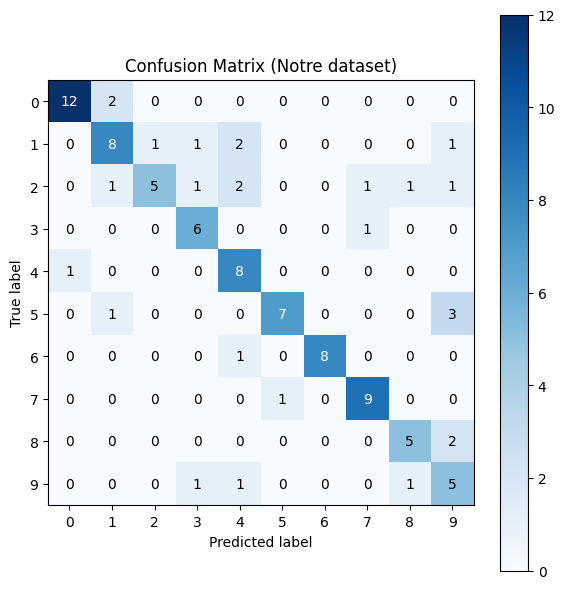

In [5]:
from torch import dtype
import cv2
import numpy as np
from torchvision.datasets import MNIST
from torch.utils.data import Dataset,DataLoader, ConcatDataset
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.optim import Optimizer
from sklearn.metrics import  confusion_matrix
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split


def preprocess_image(image):
  gray=255-image
  blur=cv2.GaussianBlur(gray,(3,3),0)
  _,bin=cv2.threshold(blur,125,255,cv2.THRESH_BINARY_INV)
  contours,_=cv2.findContours(bin.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
  best=max(contours,key=cv2.contourArea)
  x,y,w,h=cv2.boundingRect(best)
  roi=bin[y:y+h,x:x+w]

  s=max(w,h)
  square=np.zeros((s,s),dtype=np.uint8)
  dx=(s-w)//2
  dy=(s-h)//2
  square[dy:dy+h,dx:dx+w]=roi

  img28=cv2.resize(square,(28,28))
  return img28.astype(np.float32)/255.0

class MNIST_embedded(Dataset):
  def __init__(self,train=True):
    self.MNIST=MNIST(root='./data',train=train,download=True)
  def __len__(self):
    return len(self.MNIST)

  def __getitem__(self, index):
    img,label=self.MNIST[index]

    img=np.array(img,dtype=np.uint8)

    img=preprocess_image(img)

    x=torch.from_numpy(img).unsqueeze(0)
    return x,label


train_dataset_mnist=MNIST_embedded(train=True)


def preprocess_perso_image(image):
  image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  image=255-image
  blur=cv2.GaussianBlur(image,(3,3),0)
  _,bin=cv2.threshold(blur,125,255,cv2.THRESH_BINARY_INV)
  contours,_=cv2.findContours(bin.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
  best=max(contours,key=cv2.contourArea)
  x,y,w,h=cv2.boundingRect(best)
  roi=bin[y:y+h,x:x+w]

  s=max(w,h)
  square=np.zeros((s,s),dtype=np.uint8)
  dx=(s-w)//2
  dy=(s-h)//2
  square[dy:dy+h,dx:dx+w]=roi

  img28=cv2.resize(square,(28,28))
  return img28.astype(np.float32)/255.0

class perso_dataset(Dataset):
  def __init__(self,root,transform=None):
    self.dataset=ImageFolder(root=root,transform=transform)
  def __len__(self):
    return len(self.dataset)
  def __getitem__(self, index):
    img,label=self.dataset[index][0],self.dataset[index][1]
    img=np.array(img,dtype=np.uint8)
    img=preprocess_perso_image(img)
    x=torch.from_numpy(img).unsqueeze(0)
    return x,label



personal_dataset=perso_dataset(root='digits',transform=None)
print(personal_dataset.dataset.classes)
print(personal_dataset.dataset.class_to_idx)

# split 50/50
train_size=int(0.5*len(personal_dataset))
test_size=len(personal_dataset)-train_size
train_data_perso,test_data_perso=random_split(personal_dataset,[train_size,test_size])

train_data_combined = ConcatDataset([train_data_perso,train_dataset_mnist])

# ===== PHASE 1 : MNIST seul =====
train_loader=DataLoader(train_dataset_mnist,batch_size=64,shuffle=True)

class module_CNN(nn.Module):
  def __init__(self,num_classes):
    super().__init__()
    self.layer1=nn.Sequential(
        nn.Conv2d(1,1,kernel_size=5,stride=1,padding=2),
        nn.ReLU()
    )
    self.layer2=nn.Sequential(
        nn.Conv2d(1,1,kernel_size=5,stride=1,padding=2),
        nn.ReLU()
    )
    self.layer3=nn.Linear(28*28,num_classes)
  def forward(self,x):
    out=self.layer1(x)
    out=self.layer2(out)
    out=self.layer3(out.flatten(start_dim=1))
    return out

device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model=module_CNN(num_classes=10).to(device)
print(device)
optimizer=torch.optim.Adam(model.parameters(),lr=1e-3)
criterion=nn.CrossEntropyLoss()

loss_list=[]
epochs_list=[]
model.train()

def train(model, loader, epochs=5):
    for epoch in range(epochs):
        total_loss = 0
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
        loss_list.append(total_loss)
        epochs_list.append(epoch)
        print(f"Epoch {epoch+1}, loss = {total_loss/len(loader):.4f}")

# MNIST: 30 epochs
train(model, train_loader, epochs=30)

# courbe de loss MNIST
plt.figure(figsize=(8,3))
plt.plot(epochs_list,loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss by epochs (MNIST)")
plt.show()

# Eval MNIST
test_dataset=MNIST_embedded(train=False)
test_loader=DataLoader(test_dataset,batch_size=64,shuffle=False)

model.eval()
y_pred=[]
y_true=[]
correct=0
total=0
with torch.no_grad():
  for x,y in test_loader:
    x,y=x.to(device),y.to(device)
    output=model(x)
    pred=output.argmax(dim=1)
    correct+=(pred==y).sum().item()
    total+=y.size(0)
    y_pred.extend(pred.cpu().numpy())
    y_true.extend(y.cpu().numpy())
  acc=100*correct/total
  print(f"Accuracy sur MNIST={acc:.2f}%")

plt.figure(figsize=(6, 6))
cm = confusion_matrix(y_true, y_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix (MNIST)")
plt.colorbar()

classes = np.arange(10)
plt.xticks(classes, classes)
plt.yticks(classes, classes)

plt.xlabel("Predicted label")
plt.ylabel("True label")

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j, i, cm[i, j],
            ha="center", va="center",
            color="white" if cm[i, j] > thresh else "black"
        )

plt.tight_layout()
plt.show()


# ===== PHASE 2 : Dataset perso (train 50% / test 50%) =====
train_loader=DataLoader(train_data_perso,batch_size=64,shuffle=True)

# entrainement sur le dataset perso : 200 epochs
train(model, train_loader, epochs=200)

# résultats sur le test perso
test_loader=DataLoader(test_data_perso,batch_size=24,shuffle=False)
model.eval()
y_pred=[]
y_true=[]
correct=0
total=0
with torch.no_grad():
  for x,y in test_loader:
    x,y=x.to(device),y.to(device)
    output=model(x)
    pred=output.argmax(dim=1)
    correct+=(pred==y).sum().item()
    total+=y.size(0)
    y_pred.extend(pred.cpu().numpy())
    y_true.extend(y.cpu().numpy())
  acc=100*correct/total
  print(f"Accuracy sur notre dataset={acc:.2f}%")

plt.figure(figsize=(6, 6))
cm = confusion_matrix(y_true, y_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Notre dataset)")
plt.colorbar()

classes = np.arange(10)
plt.xticks(classes, classes)
plt.yticks(classes, classes)

plt.xlabel("Predicted label")
plt.ylabel("True label")

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j, i, cm[i, j],
            ha="center", va="center",
            color="white" if cm[i, j] > thresh else "black"
        )

plt.tight_layout()
plt.show()


Epoch 1, loss = 0.0022
Epoch 2, loss = 0.0022
Epoch 3, loss = 0.0022
Epoch 4, loss = 0.0023
Epoch 5, loss = 0.0022
Epoch 6, loss = 0.0022
Epoch 7, loss = 0.0023
Epoch 8, loss = 0.0021
Epoch 9, loss = 0.0021
Epoch 10, loss = 0.0022
Epoch 11, loss = 0.0022
Epoch 12, loss = 0.0022
Epoch 13, loss = 0.0021
Epoch 14, loss = 0.0020
Epoch 15, loss = 0.0021
Epoch 16, loss = 0.0021
Epoch 17, loss = 0.0020
Epoch 18, loss = 0.0020
Epoch 19, loss = 0.0021
Epoch 20, loss = 0.0019
Epoch 21, loss = 0.0021
Epoch 22, loss = 0.0020
Epoch 23, loss = 0.0021
Epoch 24, loss = 0.0020
Epoch 25, loss = 0.0021
Epoch 26, loss = 0.0019
Epoch 27, loss = 0.0021
Epoch 28, loss = 0.0019
Epoch 29, loss = 0.0020
Epoch 30, loss = 0.0020
Epoch 31, loss = 0.0020
Epoch 32, loss = 0.0020
Epoch 33, loss = 0.0020
Epoch 34, loss = 0.0020
Epoch 35, loss = 0.0020
Epoch 36, loss = 0.0019
Epoch 37, loss = 0.0018
Epoch 38, loss = 0.0020
Epoch 39, loss = 0.0019
Epoch 40, loss = 0.0019
Epoch 41, loss = 0.0019
Epoch 42, loss = 0.0019
E

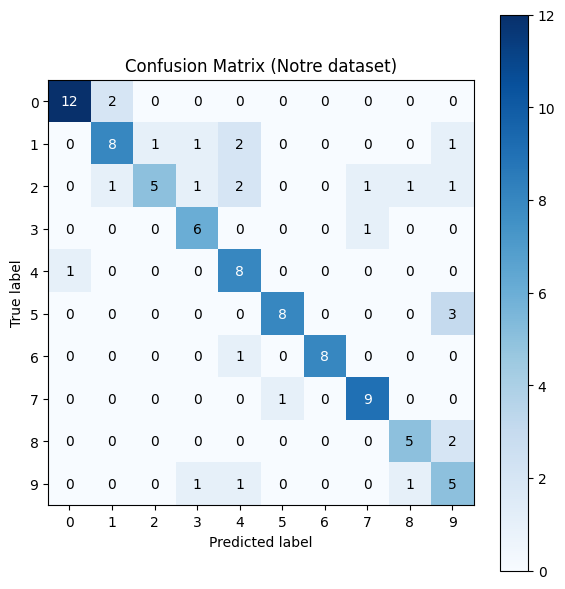

In [7]:
# ===== PHASE 3 : Dataset perso (train 50% / test 50%) ===== ( plus d'entrainement pour une meilleur précision)
train_loader=DataLoader(train_data_perso,batch_size=64,shuffle=True)

# entrainement sur le dataset perso : 200 epochs
train(model, train_loader, epochs=200)

# résultats sur le test perso
test_loader=DataLoader(test_data_perso,batch_size=24,shuffle=False)
model.eval()
y_pred=[]
y_true=[]
correct=0
total=0
with torch.no_grad():
  for x,y in test_loader:
    x,y=x.to(device),y.to(device)
    output=model(x)
    pred=output.argmax(dim=1)
    correct+=(pred==y).sum().item()
    total+=y.size(0)
    y_pred.extend(pred.cpu().numpy())
    y_true.extend(y.cpu().numpy())
  acc=100*correct/total
  print(f"Accuracy sur notre dataset={acc:.2f}%")

plt.figure(figsize=(6, 6))
cm = confusion_matrix(y_true, y_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Notre dataset)")
plt.colorbar()

classes = np.arange(10)
plt.xticks(classes, classes)
plt.yticks(classes, classes)

plt.xlabel("Predicted label")
plt.ylabel("True label")

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j, i, cm[i, j],
            ha="center", va="center",
            color="white" if cm[i, j] > thresh else "black"
        )

plt.tight_layout()
plt.show()


In [8]:
torch.save(model.state_dict(),"CNN_weights.pth")